In [1]:
## incantation
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
# Fixed url for postings in Cambridge
url = 'http://www.thebostoncalendar.com/events?utf8=%E2%9C%93&search=Cambridge'
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)

In [19]:
# The website is a single page
num_pages = 1;
#first, figure out how many pages there will be

base_url = 'http://www.thebostoncalendar.com';
event_links = []

#find the specific info within resultsCol>div
event_link_area = bs_tree.find(id = 'events')
event_postings = event_link_area.findAll("a")

#ignore Nones and do something fancy with join...
event_postings = [ep for ep in event_postings if not ep.get('class')=="img_link"]

event_ids = [ep.get('href') for ep in event_postings]

# go after each link
for id in event_ids:
    event_links.append(base_url + id)

time.sleep(1)

print "We found a lot of events: ", len(event_links)

We found a lot of events:  712


In [20]:
words_i_like = {'free': 0, 'wine': 0}

In [21]:
#save links
with open('data/event_links.pkl', 'wb') as f:
    cPickle.dump(event_links, f)

In [24]:
counter = 0

for link in event_links:
    counter +=1  
    
    #if we error out on opening the link
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
    
    #basically iterate a counter every time we see one of the key words
    for key in words_i_like.keys():
        if key in html_text:  
            words_i_like[key] +=1
    
    #every 5 links, print and save
    if counter % 5 == 0:
        print len(event_links) - counter 
        print words_i_like
        #with open('scraped_links_restart.pkl','wb') as f:
           # cPickle.dump((skill_set, index+counter),f)

URLError:
707
{'free': 8, 'wine': 0}
URLError:
URLError:
702
{'free': 11, 'wine': 0}
URLError:
URLError:
697
{'free': 14, 'wine': 1}
URLError:
URLError:
URLError:
687
{'free': 19, 'wine': 2}
URLError:
URLError:
682
{'free': 20, 'wine': 2}
URLError:
URLError:
URLError:
672
{'free': 25, 'wine': 2}
URLError:
URLError:
667
{'free': 26, 'wine': 2}
URLError:
URLError:
URLError:
657
{'free': 31, 'wine': 2}
URLError:
URLError:
652
{'free': 32, 'wine': 5}
URLError:
URLError:
URLError:
642
{'free': 35, 'wine': 6}
URLError:
URLError:
637
{'free': 38, 'wine': 6}
URLError:
URLError:
URLError:
627
{'free': 45, 'wine': 6}
URLError:
URLError:
622
{'free': 48, 'wine': 6}
URLError:
URLError:
URLError:
URLError:
URLError:
607
{'free': 58, 'wine': 8}
URLError:
URLError:
602
{'free': 59, 'wine': 8}
URLError:
URLError:
URLError:
URLError:
592
{'free': 65, 'wine': 8}
URLError:
URLError:
URLError:
582
{'free': 70, 'wine': 8}
URLError:
URLError:
577
{'free': 73, 'wine': 8}
URLError:
URLError:
URLError:
567
{'f

In [25]:
print words_i_like

{'free': 366, 'wine': 37}


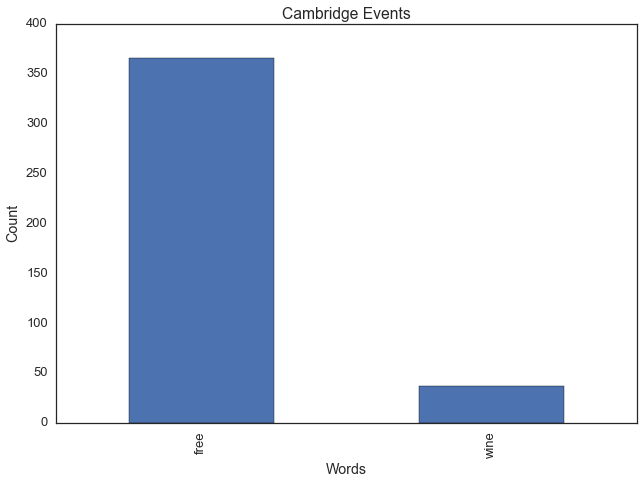

In [26]:
pseries = pd.Series(words_i_like) #pd is pandas, make skill_set into a panda series
pseries.sort(ascending=False) #so sort in descending? or maybe just in the order its already in

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Cambridge Events')
## set the x label
plt.xlabel('Words')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()